Importing Librararies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
dataset=pd.read_csv('insurance.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Analysis

In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Checking distribution of data in the given dataset

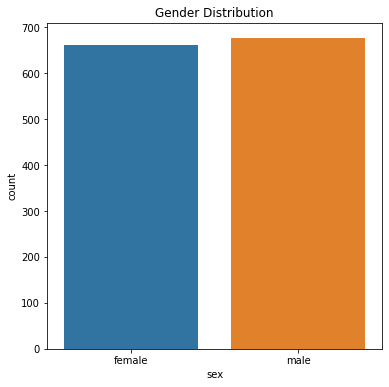

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=dataset)
plt.title('Gender Distribution')
plt.show()

In [ ]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

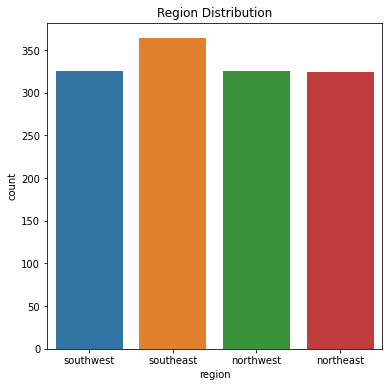

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=dataset)
plt.title('Region Distribution')
plt.show()

So the data is evenly distributed

Data Pre-Processing

We need to encode sex,smoker and region column

In [ ]:
new_data = pd.get_dummies(dataset, columns = ['sex', 'region','smoker'])

In [ ]:
print(new_data)

      age     bmi  children      charges  sex_female  sex_male  \
0      19  27.900         0  16884.92400           1         0   
1      18  33.770         1   1725.55230           0         1   
2      28  33.000         3   4449.46200           0         1   
3      33  22.705         0  21984.47061           0         1   
4      32  28.880         0   3866.85520           0         1   
...   ...     ...       ...          ...         ...       ...   
1333   50  30.970         3  10600.54830           0         1   
1334   18  31.920         0   2205.98080           1         0   
1335   18  36.850         0   1629.83350           1         0   
1336   21  25.800         0   2007.94500           1         0   
1337   61  29.070         0  29141.36030           1         0   

      region_northeast  region_northwest  region_southeast  region_southwest  \
0                    0                 0                 0                 1   
1                    0                 0       

Why one-hot encoding?-Because we do not want to give priority to any data by using label encoding

Splitting the X(indepedent) and Y(dependent) features

In [ ]:
X=new_data.drop(columns='charges',axis=1)
Y=new_data['charges']

In [ ]:
print(X)

      age     bmi  children  sex_female  sex_male  region_northeast  \
0      19  27.900         0           1         0                 0   
1      18  33.770         1           0         1                 0   
2      28  33.000         3           0         1                 0   
3      33  22.705         0           0         1                 0   
4      32  28.880         0           0         1                 0   
...   ...     ...       ...         ...       ...               ...   
1333   50  30.970         3           0         1                 0   
1334   18  31.920         0           1         0                 1   
1335   18  36.850         0           1         0                 0   
1336   21  25.800         0           1         0                 0   
1337   61  29.070         0           1         0                 0   

      region_northwest  region_southeast  region_southwest  smoker_no  \
0                    0                 0                 1          0   
1

In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape)

(1338, 11) (1070, 11)


Model Training

Linear Regression

In [ ]:
model_Linear_Regression=LinearRegression()

In [ ]:
model_Linear_Regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print("Accuracy Score of Linear Regression on Training Dataset")
model_Linear_Regression.score(X_train,Y_train)

Accuracy Score of Linear Regression on Training Dataset


0.7520187377309014

In [ ]:
print("Accuracy Score of Linear Regression on Testing Dataset")
model_Linear_Regression.score(X_test,Y_test)

Accuracy Score of Linear Regression on Testing Dataset


0.7449415564623687

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

Hyper Parameter Tuning for Ridge Regression

In [ ]:
arr=[0.25,0.5,0.75,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
best_score=0
best_alpha=0
for x in arr:
  model_Ridge_Regression=Ridge(alpha=x)
  model_Ridge_Regression.fit(X_train,Y_train)
  score=model_Ridge_Regression.score(X_test,Y_test)
  if score>best_score:
    best_score=score
    best_alpha=x
print(best_alpha," -> ",best_score)

5.0  ->  0.7450594975352245


In [ ]:
model_Ridge_Regression=Ridge(alpha=5.0)
model_Ridge_Regression.fit(X_train,Y_train)

Ridge(alpha=5.0)

In [ ]:
print("Accuracy Score of Ridge Regression on Training Dataset")
model_Ridge_Regression.score(X_train,Y_train)

Accuracy Score of Ridge Regression on Training Dataset


0.7518891205404835

In [ ]:
print("Accuracy Score of Ridge Regression on Testing Dataset")
model_Ridge_Regression.score(X_test,Y_test)

Accuracy Score of Ridge Regression on Testing Dataset


0.7450594975352245

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_Decision_Tree = DecisionTreeRegressor(random_state=0)
model_Decision_Tree.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
print("Accuracy Score of Decision Tree Regressor on Training Dataset")
model_Decision_Tree.score(X_train,Y_train)

Accuracy Score of Decision Tree Regressor on Training Dataset


1.0

In [ ]:
print("Accuracy Score of Decision Tree Regressor on Testing Dataset")
model_Decision_Tree.score(X_test,Y_test)

Accuracy Score of Decision Tree Regressor on Testing Dataset


0.7519701923861992

Thus due to huge difference in accuracy scores of Train and Test datasets in Decision Tree Regressor,thus the model is an overfit

Hence from the above 3 models,linear regression model and ridge regression model are giving better results than decision tree,hence we choose Ridge Regression for our predictive system.


Exporting Ridge Regression model as pickle file

In [ ]:
import pickle
pickle.dump(model_Ridge_Regression,open('model.pkl','wb'))